In [52]:


execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import matplotlib as mpl
%matplotlib inline


# Paper analysis

In [61]:
single_click_ent_laser = '142825'
base_f = r'M:\tnw\ns\qt\Diamond\Projects\SingleClickEnt\Data\Excitation_pulse'
folder=tb.latest_data(single_click_ent_laser, folder  = base_f)
a = pqsequence.TailAnalysis(folder, hdf5_mode='r')
agrp=a.adwingrp('adwindata')
mpl.rc("xtick",**{'top':True,'direction':'in'})
mpl.rc("ytick",**{'right':True,'direction':'in'})
mpl.rc("savefig", **{'transparent':True,'bbox':'tight'})

Converged with chi squared  76160.9209102
degrees of freedom, dof  95
RMS of residuals (i.e. sqrt(chisq/dof))  28.3141996941
Reduced chisq (i.e. variance of residuals)  801.693904317

fitted parameters at minimum, with 68% C.I.:
 0 a             -4.941306 +/-   4.092840
 1 A           1296.169906 +/-   8.883408
 2 x0             0.000132 +/-   0.007196
 3 sigma          0.961837 +/-   0.008381

correlation matrix:
               a         A         x0        sigma     
         a  1.000000
         A -0.325810  1.000000
        x0 -0.000009  0.000016  1.000000
     sigma -0.512469 -0.301755 -0.000006  1.000000

FWHM:  2.26495351776 ns


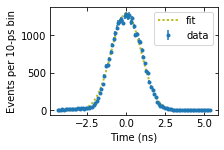

In [69]:
(h0, b0), (h1, b1) =pq_tools.get_photon_hist(
    a.pqf,start =1.854e6 ,
    length = 0.01E6, 
    hist_binsize = 1e2)

b0 = ((b0 - b0[0])*1e-3)-4.406
x = b0[:-1]
plt.figure(figsize=(6*0.5,4*0.5))
plt.errorbar(x,h0,np.sqrt(h0),fmt='.',label='data')
fit_result=fit.fit1d(x,h0,common.fit_gauss,0,1200,0,2,ret=True,do_print=True)

plt.plot(np.linspace(x[0],x[-1],201), fit_result['fitfunc'](np.linspace(x[0],x[-1],201)),':', lw=2,color = 'tab:olive',label='fit')
plt.xlabel('Time (ns)')
plt.ylabel('Events per 10-ps bin')
print 'FWHM: ', 2.35482004503 * fit_result['params_dict']['sigma'], 'ns'
plt.legend()
plt.savefig(os.path.join(base_f,'excitation_pulse.pdf'),format='pdf')

# Generic

In [ ]:
single_click_ent_laser = '113245'
folder=tb.latest_data(single_click_ent_laser, folder  = 'X:\data')
a = pqsequence.TailAnalysis(folder, hdf5_mode='r')#, pq_folder='bs_remote')
agrp=a.adwingrp('adwindata')
print folder

In [ ]:
(h0, b0), (h1, b1) =pq_tools.get_photon_hist(
    a.pqf,start =2.89e6 ,
    length = 0.02E6, 
    hist_binsize = 1e2)

b0 = b0 - b0[0]
plt.figure()
plt.plot(b0[:-1],h0)

fit_result=fit.fit1d(b0[:-1],h0,common.fit_gauss,0,1200,4000,1e3,ret=True,do_print=True)
x = b0[:-1]
plt.plot(np.linspace(x[0],x[-1],201), fit_result['fitfunc'](np.linspace(x[0],x[-1],201)), lw=2)

print 'FWHM: ', 2.35482004503 * fit_result['params_dict']['sigma']/1e3, 'ns'